In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('../ProjData/airbnb-sep-2017/listings.csv',dtype={'neighbourhood': str})
data

/Users/maxwell/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,10988680,https://www.airbnb.com/rooms/10988680,20170401232214,2017-04-02,"Simple, new, clean accommodation",I signed a new lease and moving out of my plac...,"This is clean, simple, affordable accommodatio...",I signed a new lease and moving out of my plac...,none,Place is very conveniently located in the Miss...,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.07
1,8053481,https://www.airbnb.com/rooms/8053481,20170401232214,2017-04-02,Spacious 2BR/2BATH w/Shared Kitchen,Enjoy the whole main floor of our sunny 2-leve...,"We love our big, bright home and we know you w...",Enjoy the whole main floor of our sunny 2-leve...,none,Our Mission District neighborhood is among the...,...,9.0,f,NaN,SAN FRANCISCO,f,strict,f,f,1,0.49
2,14011173,https://www.airbnb.com/rooms/14011173,20170401232214,2017-04-02,Private room - Victorian House in the Mission,Awesome location in the Mission District of SF...,NaN,Awesome location in the Mission District of SF...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,3,0.27
3,16142131,https://www.airbnb.com/rooms/16142131,20170401232214,2017-04-02,Spacious 1BR in the Mission District,"Quiet 1 bedroom apartment, with a spacious, we...",NaN,"Quiet 1 bedroom apartment, with a spacious, we...",none,NaN,...,8.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.48
4,9080622,https://www.airbnb.com/rooms/9080622,20170401232214,2017-04-02,Edwardian flat in heart of Mission,Bedroom with queen bed available. The condo i...,NaN,Bedroom with queen bed available. The condo i...,none,NaN,...,NaN,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN
5,936209,https://www.airbnb.com/rooms/936209,20170401232214,2017-04-02,Sunny Room w/Roofdeck @Dolores Park,Come stay in the heart of SF's best neighborho...,"Located just off 18th & Guerrero, in the safes...",Come stay in the heart of SF's best neighborho...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,f,moderate,f,f,1,1.27
6,7048973,https://www.airbnb.com/rooms/7048973,20170401232214,2017-04-02,Boutique Condo in the Mission,Boutique condo in the heart of the vibrant Mis...,NaN,Boutique condo in the heart of the vibrant Mis...,none,NaN,...,9.0,f,14755773,SAN FRANCISCO,f,strict,f,f,1,0.35
7,7998215,https://www.airbnb.com/rooms/7998215,20170401232214,2017-04-02,Pretty & Relaxing Bedroom with Bathroom,"Quiet one bedroom, one bath with all the ameni...",NaN,"Quiet one bedroom, one bath with all the ameni...",none,"We are located in the middle of the Mission, w...",...,10.0,f,STR-0000735,SAN FRANCISCO,f,strict,f,f,2,2.56
8,12815115,https://www.airbnb.com/rooms/12815115,20170401232214,2017-04-02,Spacious Mission Condo,"Built in 2014, this modern penthouse's 3 porch...",NaN,"Built in 2014, this modern penthouse's 3 porch...",none,NaN,...,NaN,f,NaN,SAN FRANCISCO,f,flexible,f,f,2,NaN
9,10406646,https://www.airbnb.com/rooms/10406646,20170401232214,2017-04-02,Bright Skylight-Filled 2 Bedroom in the Mission,Located in a residential part of the Mission d...,Located in a residential part of the Mission d...,Located in a residential part of the Mission d...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,f,moderate,f,f,3,2.77


In [22]:
basic = data[['neighbourhood_cleansed', 'price']]
basic.head()

,neighbourhood_cleansed,price
0,Mission,$49.00
1,Mission,$220.00
2,Mission,$100.00
3,Mission,$117.00
4,Mission,$200.00


In [23]:
basic['price'] = basic['price'].replace( '[\$,)]','', regex=True ).astype(float)
basic.head()

/Users/maxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,neighbourhood_cleansed,price
0,Mission,49.0
1,Mission,220.0
2,Mission,100.0
3,Mission,117.0
4,Mission,200.0


In [24]:
averages = pd.DataFrame(columns=['neighborhood', 'avg_price'])

for name, group in basic.groupby('neighbourhood_cleansed'):
    averages.loc[len(averages)] = [name, group['price'].mean()]
    
averages

,neighborhood,avg_price
0,Bayview,125.703390
1,Bernal Heights,201.075388
2,Castro/Upper Market,249.518750
3,Chinatown,277.407895
4,Crocker Amazon,115.142857
5,Diamond Heights,199.590909
6,Downtown/Civic Center,210.152482
7,Excelsior,144.091503
8,Financial District,271.478571
9,Glen Park,231.829268


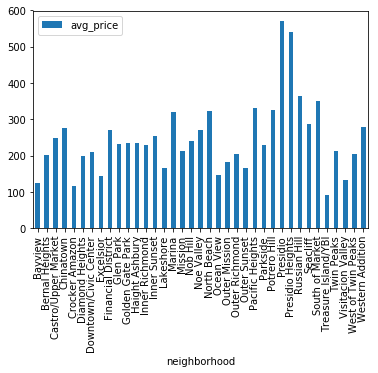

In [25]:
import matplotlib.pyplot as plt
averages.plot(x='neighborhood', y='avg_price', kind='bar')
plt.show()
averages.to_csv('averages.csv', index=False)

In [26]:
reviews = data[['review_scores_rating','price']]
reviews['price'] = reviews['price'].replace( '[\$,)]','', regex=True ).astype(float)
reviews['review_scores_rating'] = reviews['review_scores_rating'].astype(float)
reviews.head()

/Users/maxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/maxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,review_scores_rating,price
0,100.0,49.0
1,96.0,220.0
2,90.0,100.0
3,100.0,117.0
4,NaN,200.0


In [27]:
type(reviews['review_scores_rating'][0])

numpy.float64

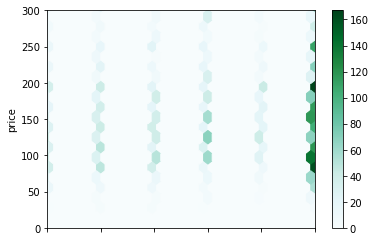

In [28]:
reviews.plot(x='review_scores_rating', y='price', kind='hexbin', xlim=[95,100], ylim=[0,300], gridsize = 500)
plt.show()

In [29]:
reviews = reviews[np.isfinite(reviews['review_scores_rating'])]

In [30]:
reviews.sample(n=50)
reviews.head()

,review_scores_rating,price
0,100.0,49.0
1,96.0,220.0
2,90.0,100.0
3,100.0,117.0
5,96.0,162.0


In [31]:
reviews.to_csv('reviewSample.csv', index=False)

In [32]:
houses = data[['neighbourhood_cleansed', 'latitude','longitude','reviews_per_month','review_scores_value', 'price','bathrooms','bedrooms', 'number_of_reviews','listing_url','name']]



In [33]:
houses.to_csv('houses.csv', index=False)

In [34]:
reviewScore = pd.DataFrame(columns=['neighborhood', 'avg_review'])

for name, group in data.groupby('neighbourhood_cleansed'):
    reviewScore.loc[len(reviewScore)] = [name, group['review_scores_value'].mean()]
    
reviewScore

,neighborhood,avg_review
0,Bayview,9.148936
1,Bernal Heights,9.505525
2,Castro/Upper Market,9.493703
3,Chinatown,9.161616
4,Crocker Amazon,9.086957
5,Diamond Heights,9.705882
6,Downtown/Civic Center,9.027248
7,Excelsior,9.255814
8,Financial District,9.313131
9,Glen Park,9.695652


In [35]:
reviewNumber = pd.DataFrame(columns=['neighborhood', 'review_number'])

for name, group in data.groupby('neighbourhood_cleansed'):
    reviewNumber.loc[len(reviewNumber)] = [name, group['number_of_reviews'].mean()]
    
reviewNumber

,neighborhood,review_number
0,Bayview,34.525424
1,Bernal Heights,27.583149
2,Castro/Upper Market,35.029167
3,Chinatown,3.802632
4,Crocker Amazon,39.392857
5,Diamond Heights,20.590909
6,Downtown/Civic Center,15.519504
7,Excelsior,26.091503
8,Financial District,20.678571
9,Glen Park,29.012195


In [36]:
reviewData = pd.DataFrame(columns=['avg_review','neighborhood'])
reviewData['neighborhood'] = reviewScore['neighborhood']
reviewData['avg_review'] = reviewScore['avg_review']

reviewData

,avg_review,neighborhood
0,9.148936,Bayview
1,9.505525,Bernal Heights
2,9.493703,Castro/Upper Market
3,9.161616,Chinatown
4,9.086957,Crocker Amazon
5,9.705882,Diamond Heights
6,9.027248,Downtown/Civic Center
7,9.255814,Excelsior
8,9.313131,Financial District
9,9.695652,Glen Park


In [37]:
reviewData.to_csv('reviewData.csv', index=False)

In [38]:
weekly = data[['latitude','longitude', 'price','reviews_per_month']]
weekly['price'] = weekly['price'].replace( '[\$,)]','', regex=True ).astype(float)
weekly['reviews_per_month'].fillna(0,inplace=True)
weekly = weekly[np.isfinite(weekly['price'])]
weekly

/Users/maxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/maxwell/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,latitude,longitude,price,reviews_per_month
0,37.754184,-122.406514,49.0,0.07
1,37.754166,-122.421534,220.0,0.49
2,37.758506,-122.406152,100.0,0.27
3,37.756549,-122.422025,117.0,0.48
4,37.760051,-122.421352,200.0,0.00
5,37.759495,-122.424874,162.0,1.27
6,37.760997,-122.413124,230.0,0.35
7,37.750543,-122.416559,173.0,2.56
8,37.756288,-122.408738,600.0,0.00
9,37.757246,-122.409315,250.0,2.77


In [39]:
weekly.to_csv('weekly.csv', index=False)

In [48]:
averages.to_json(orient='records')

'[{"neighborhood":"Bayview","avg_price":125.7033898305},{"neighborhood":"Bernal Heights","avg_price":201.0753880266},{"neighborhood":"Castro\\/Upper Market","avg_price":249.51875},{"neighborhood":"Chinatown","avg_price":277.4078947368},{"neighborhood":"Crocker Amazon","avg_price":115.1428571429},{"neighborhood":"Diamond Heights","avg_price":199.5909090909},{"neighborhood":"Downtown\\/Civic Center","avg_price":210.1524822695},{"neighborhood":"Excelsior","avg_price":144.091503268},{"neighborhood":"Financial District","avg_price":271.4785714286},{"neighborhood":"Glen Park","avg_price":231.8292682927},{"neighborhood":"Golden Gate Park","avg_price":235.875},{"neighborhood":"Haight Ashbury","avg_price":235.5531400966},{"neighborhood":"Inner Richmond","avg_price":230.2926829268},{"neighborhood":"Inner Sunset","avg_price":255.0470588235},{"neighborhood":"Lakeshore","avg_price":164.9423076923},{"neighborhood":"Marina","avg_price":320.9509803922},{"neighborhood":"Mission","avg_price":212.0250965

In [51]:
monthly = pd.DataFrame(columns=['neighborhood', 'avg_reviews_month'])

for name, group in data.groupby('neighbourhood_cleansed'):
    monthly.loc[len(monthly)] = [name, group['reviews_per_month'].mean()]
    
monthly.to_json(orient='records')

'[{"neighborhood":"Bayview","avg_reviews_month":2.8995744681},{"neighborhood":"Bernal Heights","avg_reviews_month":1.6365479452},{"neighborhood":"Castro\\/Upper Market","avg_reviews_month":1.5949875312},{"neighborhood":"Chinatown","avg_reviews_month":0.6697058824},{"neighborhood":"Crocker Amazon","avg_reviews_month":2.4304347826},{"neighborhood":"Diamond Heights","avg_reviews_month":2.7627777778},{"neighborhood":"Downtown\\/Civic Center","avg_reviews_month":2.1945263158},{"neighborhood":"Excelsior","avg_reviews_month":1.9432307692},{"neighborhood":"Financial District","avg_reviews_month":1.8461538462},{"neighborhood":"Glen Park","avg_reviews_month":1.3395652174},{"neighborhood":"Golden Gate Park","avg_reviews_month":1.2025},{"neighborhood":"Haight Ashbury","avg_reviews_month":1.5086604361},{"neighborhood":"Inner Richmond","avg_reviews_month":1.6633183857},{"neighborhood":"Inner Sunset","avg_reviews_month":1.7951181102},{"neighborhood":"Lakeshore","avg_reviews_month":1.7471428571},{"nei